<div style="text-align:center"><img src="https://hackmd.io/_uploads/H1ZOOXMRh.png" /></div>


---

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

| Matrícula   | Nome do Acadêmico          |
| ----------- | -------------------------- |
| **1975660** | Felipe Paes de Lima        |
| **3972217** | Marlon Luciano da Silva    |
| **4469827** | Nazaré Aline Sá de Azevedo |
| **4518087** | Roger da Rosa Szortyka     |
| **4525523** | Sandro Loch                |

## Previsão de Epidemias de Dengue Utilizando Modelos de Aprendizado de Máquina: Um Estudo com Dados do Sistema Infodengue


  A **dengue** é uma doença viral transmitida pelo mosquito Aedes aegypti, que se espalhou rapidamente por todas as regiões do mundo, principalmente nas regiões tropicais e subtropicais. A doença é considerada um grave problema de saúde pública, com impacto significativo na qualidade de vida das pessoas e na economia dos países afetados. Segundo a Organização Mundial da Saúde (OMS), a dengue é a arbovirose urbana mais prevalente nas Américas, com um aumento significativo no número de casos nas últimas décadas. A dengue é uma doença complexa, com múltiplos fatores que influenciam sua transmissão e disseminação. A falta de tratamentos específicos e vacinas eficazes torna a prevenção e o controle da doença ainda mais desafiadores. Nesse contexto, a aplicação de técnicas de Machine Learning pode ser uma ferramenta valiosa para a previsão e prevenção de surtos de dengue. Este trabalho tem como objetivo apresentar um estudo sobre a dengue e a aplicação de técnicas de Machine Learning para previsão e prevenção de surtos da doença. Serão apresentados estudos científicos que discutem a aplicação de técnicas de Machine Learning para previsão e prevenção de surtos de dengue.

<small>**Referências:**</small>  
- <small>Dengue | Biblioteca Virtual em Saúde MS1</small>
- <small>OPAS/OMS | Organização Pan-Americana da Saúde2</small>
- <small>Dengue: o que você precisa saber sobre a doença! - Brasil Escola3</small>
- <small>Dengue — Ministério da Saúde - Governo Federal4</small>
- <small>Dengue - Fiocruz Minas - O mosquito Aedes aegypti faz parte da história e vem se espalhando pelo mundo desde o período das colonizações</small>

## Objetivo

O objetivo principal deste projeto é desenvolver modelos de aprendizado de máquina capazes de **prever incidências de dengue da semana posterior**, com base em dados históricos do Sistema Infodengue.

<small>*Nota*: *A previsão de surtos de doenças como a dengue envolve vários fatores, incluindo vigilância epidemiológica, monitoramento de vetores e intervenções de saúde pública. Portanto, modelos de previsão devem ser usados em conjunto com outras informações para tomar decisões informadas sobre medidas de controle e prevenção*</small>


## Especificação Técnica

**Dataset:**  Utilizamos o banco de dados do Sistema Infodengue, que contém informações
sobre notificações de dengue. Os dados foram formatados em um arquivo CSV e incluem campos
como geocódigo do município, nome do município, estado do município, semana epidemiológica e ano
de notificação.

**Formato:**  A base de dados encontra-se em **formato CSV**. Possui **10 colunas**, **5.332.901 observações**, dividida em **4 arquivos**, sendo cada arquivo correspondente à um estado(CE, MG, RJ, SC).

**Descrição das Features:** A tabela abaixo descreve mais detalhadamente a composição do conjunto de dados.

| **Coluna**     | **Tipo**         | **Descrição**                                                           | **Exemplo**  |
|----------------|------------------|-------------------------------------------------------------------------|--------------|
| uf             | texto (str)      | Nome da unidade federativa do Brasil                                    | Minas Gerais |
| geocodigo      | número (int64)   | Código IBGE associado aos município brasileiros composto por 7 digitos  | 4209102      |
| nome_municipio | texto (str)      | Nome do município                                                       | Joinville    |
| dt_notific     | data (Timestamp) | Data da notificação em format ISO 8601                                  | 2020-07-22   |
| se_notif       | número (int64)   | Semana em que ocorreu a notificação                                     | 18           |
| ano_notif      | número (int64)   | Ano em que ocorreu a notificação                                        | 2022         |
| temp_med       | número (float64) | Temperatura média em graus Celsius                                      | 20.466202    |
| precip_med     | número (float64) | Precipitação média                                                      | 0.035414     |
| pressao_med    | número (float64) | Pressão atmosférica média                                               | 1.005391     |
| umid_med       | número (float64) | Umidade relativa do ar média                                            | 87.35066     |

**Métodos de Pré-processamento:** Um dos principais destaques nas tarefas de pré-processamento deste projeto foi a extração e transformação necessárias para obtenção deste conjunto de dados (detalhes na seção *Metodologia para Extração de Dados*). Em posse dos dados, outras operações de pré-processamento foram necessárias, destacando-se:
  - Extração de dados (mais detalhes podem ser encontrados em [**Metodologia para Extração de Dados**](##Metodologia-para-Extração-de-Dados))
  - Agrupamento e/ou categorização dos dados, gerando uma nova coluna com nossa variável de saída (quantdade total de notificações ou ocorrências).
  - Agrupamento dos dados em intervalos semanais.
  - Filtragem para geração de nova coluna com valor total de notificações da semana posteior.
  
**Modo de Aprendizado**: Supervisionado.

**Tarefa de Aprendizado:** Será aplicada a tarefa de Regressão.

**Algoritmos Avaliados:** Random Forest, Decision Tree, Gradient Boosting e Ada Boost .

**Métricas Utilizadas:** Raiz do erro quadrático médio (RMSE, do inglês Root Mean Squared Error) e erro absoluto médio (MAE, do inglês median absolute error). ([**Nogueira, 2020**](#Referências-Bibliográficas). p. 132)

## Metodologia para Extração de Dados 
### 1. Extração, Transformação e Inserção de Dados de Notificações de Casos no Banco de Dados do Infodengue
#### Sistema Infodengue usando a API do PySUS por meio do script AlertaDengue

Nesta seção, descreveremos detalhadamente o processo de pré-processamento de dados realizado pelo script *pysus.py* do [AlertaDengue](https://github.com/AlertaDengue/AlertaDengue/blob/main/AlertaDengue/dbf/pysus.py), Os dados são coletados do [DataSUS](https://datasus.saude.gov.br/) por meio da  biblioteca [PySUS](https://github.com/AlertaDengue/pysus), abordando a coleta, tratamento e inserção dos dados, passando por várias transformações que são, por fim, inseridos no banco de dados da dengue no sistema [Infodengue](https://info.dengue.mat.br/informacoes/), utilizando o PostgreSQL como mecanismo de gerenciamento de banco de dados.

- **Coleta de Dados** : O script inicia o processo de pré-processamento coletando dados do DataSUS. Isso envolve a aquisição de informações sobre casos de doenças específicas, como dengue, chikungunya e zika, para um determinado ano.
- **Cálculo de Campos Relevantes** : Os dados coletados não estão prontos para serem inseridos no banco de dados do sistema Infodengue. Portanto, o script executa uma série de cálculos para criar campos adicionais e corrigir dados inconsistentes ou mal formatados. Isso inclui o cálculo da data de nascimento com base na idade do paciente, a adição de dígitos verificadores aos geocódigos municipais e a correção de códigos CID10 de doenças.
- **Transformação de Dados** : O script realiza transformações nos dados para garantir que eles atendam aos requisitos do sistema Infodengue. Isso inclui a padronização de campos, como a representação da semana epidemiológica brasileira.
- **Inserção no Banco de Dados** : Após a coleta e transformação dos dados, o script estabelece uma conexão com o banco de dados PostgreSQL do sistema Infodengue. Ele insere os dados pré-processados no banco de dados, seguindo uma estratégia de inserção que evita a duplicação de registros. Isso garante que os dados estejam prontos para análises futuras e disponíveis para consulta no sistema Infodengue.
- **Registro de Erros**: Durante o processo de pré-processamento e inserção, o script monitora possíveis erros ou exceções. Em caso de erro, ele registra informações detalhadas em um arquivo de log para fins de depuração e auditoria.

### Bibliotecas Usadas no AlertaDengue (Notificações de Casos):
#### Para realizar essas operações, o script [pysus.py](https://github.com/AlertaDengue/AlertaDengue/blob/main/AlertaDengue/dbf/pysus.py) faz uso das seguintes bibliotecas:

- **numpy (np)** : Esta biblioteca é amplamente usada para cálculos matemáticos e operações em arrays multidimensionais. No contexto deste script, o numpy é utilizado para efetuar cálculos em campos como idade e geocódigos municipais.

- **pandas (pd)** : O pandas é uma biblioteca poderosa para manipulação e análise de dados. Aqui, o pandas é empregado para estruturar e limpar os dados, incluindo a seleção de colunas relevantes, ajuste de tipos de dados e tratamento de valores ausentes.

- **psycopg2** : Essa biblioteca possibilita a conexão com um banco de dados PostgreSQL. O script a utiliza para se conectar ao banco de dados do sistema Infodengue e inserir os dados processados.

- **pathlib** : A biblioteca pathlib é usada para lidar com caminhos de arquivo e diretório de forma eficiente. Ela auxilia na organização e manipulação de arquivos, incluindo a leitura de arquivos Parquet e a criação de diretórios para armazenamento temporário.

- **datetime e timedelta** : Essas bibliotecas nativas do Python são usadas para manipulação de datas e horários. São fundamentais para calcular datas de nascimento a partir da idade dos pacientes e para calcular datas epidemiológicas.

- **glob** : A biblioteca glob é útil para pesquisa de arquivos em um diretório com base em padrões de nome de arquivo. Aqui, ela é usada para encontrar e processar múltiplos arquivos Parquet com dados do DataSUS.

- **logging** : O módulo de logging é usado para registrar informações relevantes durante a execução do script, auxiliando na depuração e no monitoramento.

- **settings (AlertaDengue.ad_main)** : Essa importação específica refere-se a configurações personalizadas definidas nas conficurações principais do projeto AlertaDengue. Essas configurações incluem detalhes de conexão com o banco de dados PostgreSQL.

- **episem (AlertaDengue.dados.episem)** : A biblioteca episem é utilizada para cálculos relacionados a semanas epidemiológicas, que são cruciais para a análise de dados relacionados à dengue.

- **SINAN (pysus.online_data)** : SINAN é uma ferramenta que permite o acesso a dados online, incluindo a obtenção de dados do DataSUS. Neste contexto, ele é usado para baixar dados relacionados à dengue.

### 2. Extração, Transformação e Inserção de Dados Climáticos no Banco de Dados do Infodengue
#### Sistema Infodengue usando a API do Copernicus por meio do script [copebr.py](https://github.com/osl-incubator/satellite-weather-downloader/blob/main/satellite/weather/copebr.py) Satellite-Weather-Downloader

O [Satellite-Weather-Downloader](https://github.com/osl-incubator/satellite-weather-downloader) captura os dados meteorológicos da API [Copernicus](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels). Esta biblioteca oferece funcionalidades para capturar, converter e processar os dados para uso em análises meteorológicas no contexto brasileiro.

Os principais componentes e funcionalidades do script [copebr.py](https://github.com/osl-incubator/satellite-weather-downloader/blob/main/satellite/weather/copebr.py#L230) do **Satellite-Weather-Downloader** incluem:

- **CopeBRDatasetExtension** : Esta classe é uma extensão para objetos xr.Dataset que permite adicionar funcionalidades específicas do Brasil para dados meteorológicos.

- **Métodos como to_dataframe e to_sql** : Permitem converter os dados do conjunto de dados xarray em estruturas de dados como DataFrames do Pandas e inseri-los em um banco de dados SQL, respectivamente.

- **Métodos como _geocode_ds e _geocode_to_dataframe** : São usados para processar e extrair dados meteorológicos específicos para uma localização geográfica (identificada pelo IBGE geocode).

- **_convert_to_br_units** : É usado para converter unidades de medidas para padrões brasileiros, como a conversão de Kelvin para Celsius, metros para milímetros e Pascal para ATM.

- **_get_latlons** : Extrai as coordenadas de latitude e longitude para um determinado geocode IBGE de uma cidade brasileira.

*Destacamos a função [_convert_to_br_units](https://github.com/osl-incubator/satellite-weather-downloader/blob/main/satellite/weather/copebr.py#L230) que é responsável por converter unidades de medidas em um conjunto de dados xarray para padrões brasileiros. Isso é importante porque as unidades de medidas usadas em dados meteorológicos podem variar dependendo da origem dos dados, e é útil padronizá-las para uma análise mais consistente no contexto brasileiro.*

#### Explicação passo a passo do que esta função faz:

  1. Recebe um conjunto de dados xr.Dataset como entrada.
  2. Verifica quais variáveis de dados estão presentes no conjunto de dados (por meio da lista de nomes das variáveis vars).
  3. Para cada variável presente no conjunto de dados, verifica se ela corresponde a alguma variável específica de acordo com seu nome (por exemplo, "t2m" para temperatura em Kelvin, "tp" para precipitação em metros, "msl" para pressão em Pascal).
  4. Se uma variável corresponder a alguma dessas variáveis específicas, a função realiza as seguintes conversões de unidades:
  5. Para "t2m" (temperatura em Kelvin), ela converte para Celsius subtraindo 273.15 e define as unidades e o nome longo apropriados.
  6. Para "d2m" (temperatura do ponto de orvalho em Kelvin), ela realiza o mesmo cálculo de conversão para Celsius e também calcula a umidade relativa do ar em porcentagem usando a fórmula de [Buck](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_Arden_Buck).
  7. Para "tp" (precipitação em metros), ela converte para milímetros multiplicando por 1000 e arredonda para 5 casas decimais. Também define as unidades e o nome longo apropriados.
  8. Para "msl" (pressão ao nível do mar em Pascal), ela converte para ATM multiplicando por um fator específico e define as unidades e o nome longo apropriados.

*A função retorna o conjunto de dados resultante com as unidades convertidas e os nomes convencionados.*

### Bibliotecas Usadas no Satellite-Weather-Downloader (Captura de dados Climáticos):
#### Para realizar essas operações, o script [copebr.py](https://github.com/osl-incubator/satellite-weather-downloader/blob/main/satellite/weather/copebr.py) faz uso das seguintes bibliotecas:


- **dask** : Utilizado para computação paralela e assíncrona, útil para processamento eficiente de grandes volumes de dados.

- **dask.array** : Oferece suporte para arrays Dask, que são úteis para computação paralela em dados multidimensionais, como dados climáticos.

- **dask.dataframe** : Usado para trabalhar com estruturas de dados semelhantes a DataFrames em um ambiente Dask.

- **numpy** : Amplamente utilizado para cálculos matemáticos e operações em arrays multidimensionais.

- **xarray** : Essencial para trabalhar com dados multidimensionais, como dados climáticos, de forma eficiente.

- **loguru** : Biblioteca de registro de eventos usada para registrar informações durante a execução do script, auxiliando na depuração e no monitoramento.

- **sqlalchemy.engine.Connectable** : Usado para estabelecer conexões com bancos de dados SQL, como o PostgreSQL, para inserir dados processados.

**Essas bibliotecas desempenham papéis essenciais no processamento e preparação dos dados antes de serem inseridos no sistema Infodengue, garantindo que estejam prontos para análise e consulta.**

Em resumo, o pré-processamento de dados realizado pelos scripts é uma etapa crítica que visa garantir a qualidade, consistência e integridade dos dados coletados antes de serem incorporados ao banco de dados do sistema Infodengue.


## Agrupamento e/ou categorização dos dados
### Consulta no banco de dados Infodengue e exportação do conjunto de dados em formato CSV
Para a obtenção dos dados relevantes necessários para o treinamento dos modelos de machine learning, foi criado uma função **weather_notific** especifica no script do repositório [ml-dengue-predict](https://github.com/esloch/ml-dengue-predict) para selecionar e filtrar os campos e dados pertinentes em uma série temporal. Essa série temporal abrange um período significativo, de 2010 a 2023, e envolve quatro estados e, os campos selecionados incluem informações de Notificações e Varáveis Climáticas.

Para isso e script [fetchinfodenguedata.py](https://github.com/esloch/ml-dengue-predict/blob/main/fetchinfodenguedata/fetchinfodenguedata.py) é responsável por recuperar dados de clima e notificação para um estado específico e um intervalo de datas fornecido. Ele realiza uma consulta que envolve várias junções de tabelas para combinar dados meteorológicos e de notificação relevantes para análises posteriores.

- Query *[weather_notific](https://github.com/esloch/ml-dengue-predict/blob/main/fetchinfodenguedata/fetchinfodenguedata.py#L162)*

![](https://hackmd.io/_uploads/By2jxBa03.png)

Após a recuperação desses dados, eles são exportados para um arquivo CSV. Esse arquivo CSV contém os dados que serão usados no treinamento dos modelos de machine learning, permitindo análises avançadas e a criação de modelos preditivos relacionados à dengue e outras doenças transmitidas por vetores. 


---

---

### Análise Exploratória dos Dados

Na **Análise Exploratória dos Dados** realizamos alguns agrupamentos e visualizacões para uma melhor compreensão do conjunto de dados.

### Importando Bibliotecas

Primeiro importamos as bibliotecas e módulos necessários

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # silence warnings

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

### Conexão com o Dataset utilizado

Como os dados se encontram separados em 4 arquivos, carregamos cada arquivo em seu respectivo DataFrame através 
da função `read_csv`. Depois unimos todos em um mesmo DataFrame, atribuido à variável dados através da função `concat`.

In [2]:
dataframes = [
    # treinar com todo dataset na versão final
    # pd.read_csv("data/weather_notification_CE_2010-01-01_2023-08-30.csv", index_col=[0]),
    # pd.read_csv("data/weather_notification_PR_2010-01-01_2023-08-30.csv", index_col=[0]),
    # pd.read_csv("data/weather_notification_RJ_2010-01-01_2023-08-30.csv", index_col=[0]),
    pd.read_csv("data/weather_notification_SC_2010-01-01_2023-08-30.csv", index_col=[0]),
]

df = pd.concat(dataframes)

### Exibição dos Primeiros Registros do Conjunto de Dados: 

Podemos exibir um trecho dos dados com o método `head`.

In [3]:
df.head()

uf  geocodigo nome_municipio  dt_notific  se_notif  ano_notif  \
0  Santa Catarina    4209102      Joinville  2023-04-30        18       2023   
1  Santa Catarina    4209102      Joinville  2023-04-30        18       2023   
2  Santa Catarina    4209102      Joinville  2023-04-30        18       2023   
3  Santa Catarina    4209102      Joinville  2023-04-30        18       2023   
4  Santa Catarina    4209102      Joinville  2023-04-30        18       2023   

    temp_med  precip_med  pressao_med  umid_med  
0  20.466202    0.035414     1.005391  87.35066  
1  20.466202    0.035414     1.005391  87.35066  
2  20.466202    0.035414     1.005391  87.35066  
3  20.466202    0.035414     1.005391  87.35066  
4  20.466202    0.035414     1.005391  87.35066

In [4]:
cols = ['uf', 'geocodigo', 'nome_municipio', 'dt_notific', 'se_notif', 'ano_notif', 'precip_med', 'pressao_med', 'temp_med', 'umid_med']

df_combined = df[cols] \
    .groupby(['uf', 'nome_municipio', 'se_notif', 'ano_notif', 'geocodigo']) \
    .agg(casos_notif=('dt_notific', 'count'),
         precip_med=('precip_med', 'mean'),
         pressao_med=('pressao_med', 'mean'),
         temp_med=('temp_med', 'mean'),
         umid_med=('umid_med', 'mean')).reset_index() \
    .sort_values(['ano_notif', 'se_notif'], ascending=[False, False])


print(f'\nTotal de registros para no novo conjunto de dados: {len(df_combined)} \n')

df_combined.head()


Total de registros para no novo conjunto de dados: 20124 



uf          nome_municipio  se_notif  ano_notif  geocodigo  \
334   Santa Catarina                  Apiúna        33       2023    4201257   
483   Santa Catarina                Araquari        33       2023    4201307   
852   Santa Catarina  Balneário Barra do Sul        33       2023    4202057   
1235  Santa Catarina      Balneário Camboriú        33       2023    4202008   
1583  Santa Catarina      Balneário Piçarras        33       2023    4212809   

      casos_notif  precip_med  pressao_med   temp_med   umid_med  
334             1    0.118710     0.996674  19.904106  82.034000  
483            10    0.018671     1.006139  19.094256  87.402260  
852             4    0.018211     1.008367  18.981406  91.471262  
1235           10    0.011527     1.009745  16.144434  80.873799  
1583            3    0.024269     1.010688  14.223744  79.497622

### Gráfico de Dispersão dos Casos de Dengue em Relação às Variáveis Climáticas


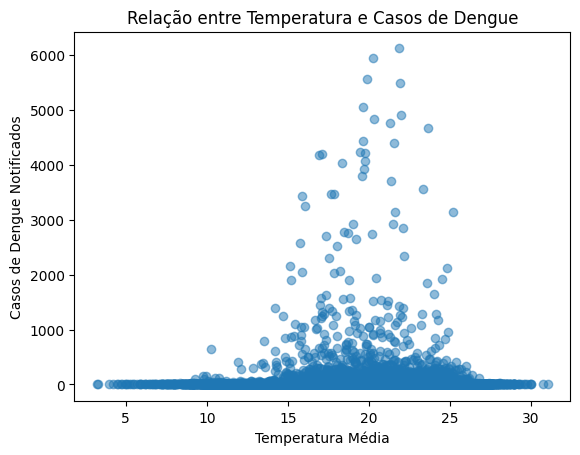

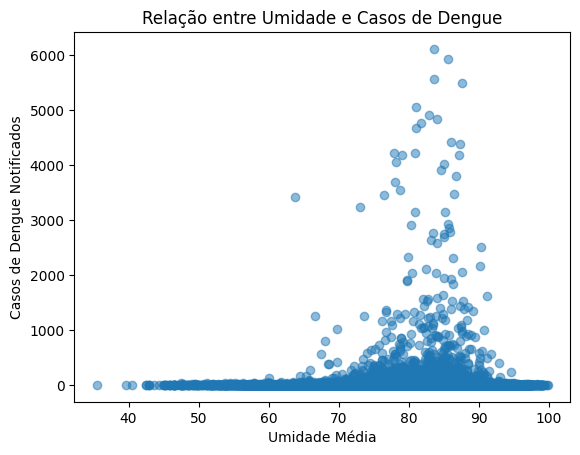

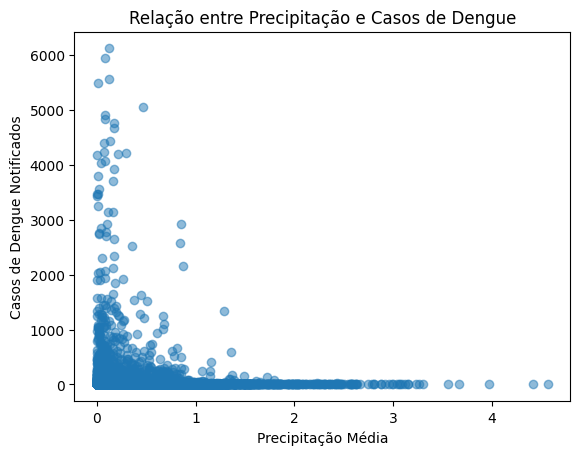

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df_combined['temp_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Temperatura Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Temperatura e Casos de Dengue')
plt.show()

plt.scatter(df_combined['umid_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Umidade Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Umidade e Casos de Dengue')
plt.show()

plt.scatter(df_combined['precip_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Precipitação Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Precipitação e Casos de Dengue')
plt.show()


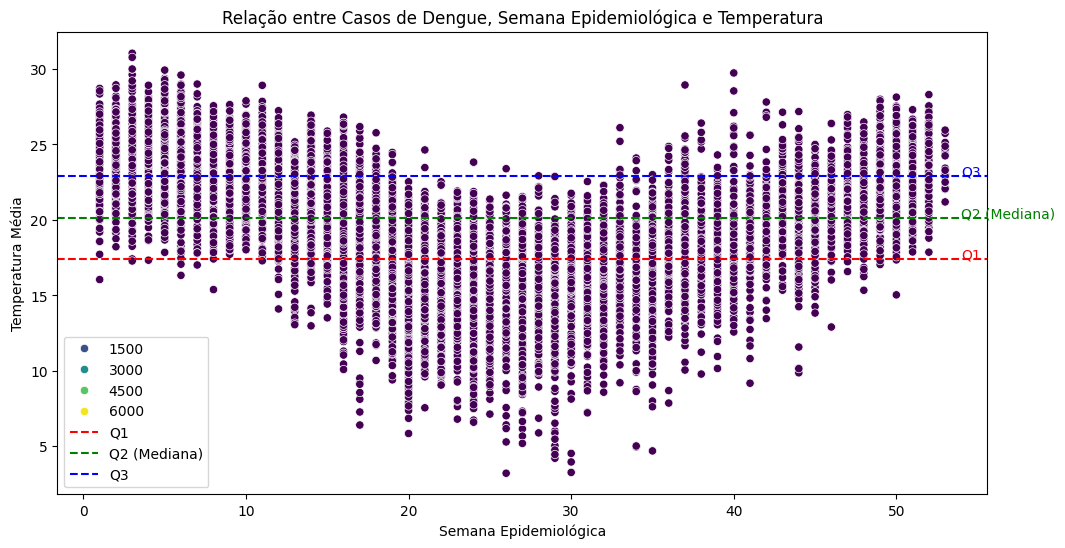

In [6]:

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_combined, 
       x='se_notif', 
       y='temp_med', 
       hue='casos_notif', 
       palette='viridis'
)

# Calcular os quartis da temperatura
Q1 = df_combined['temp_med'].quantile(0.25)
Q3 = df_combined['temp_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Temperatura Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Temperatura')
plt.legend()
plt.show()


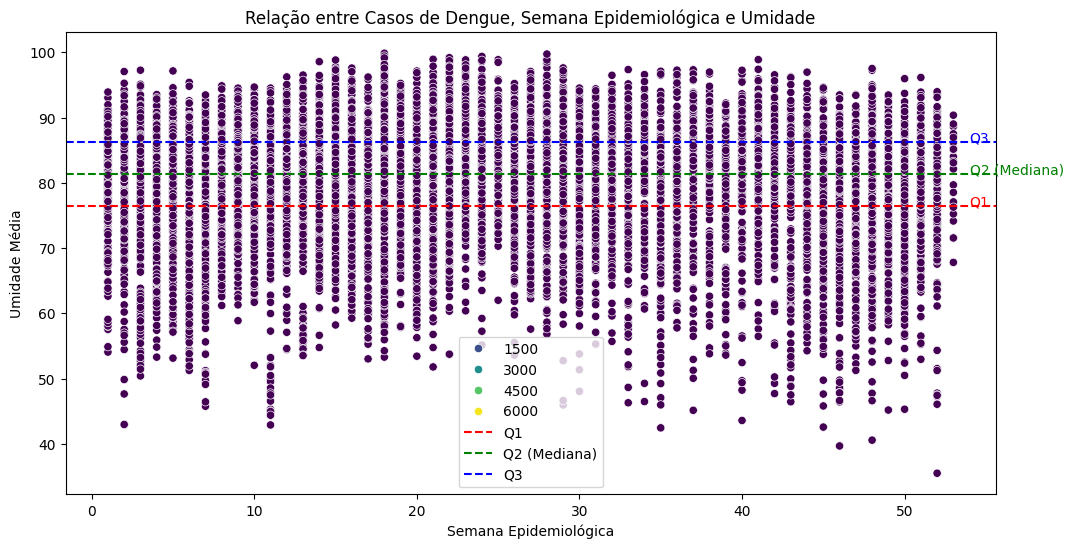

In [7]:
# Gráfico de dispersão de casos de dengue e temperatura
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_combined, 
    x='se_notif', 
    y='umid_med', 
    hue='casos_notif', 
    palette='viridis'
)

# Calcular os quartis da temperatura
Q1 = df_combined['umid_med'].quantile(0.25)
Q3 = df_combined['umid_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Umidade Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Umidade')
plt.legend()
plt.show()


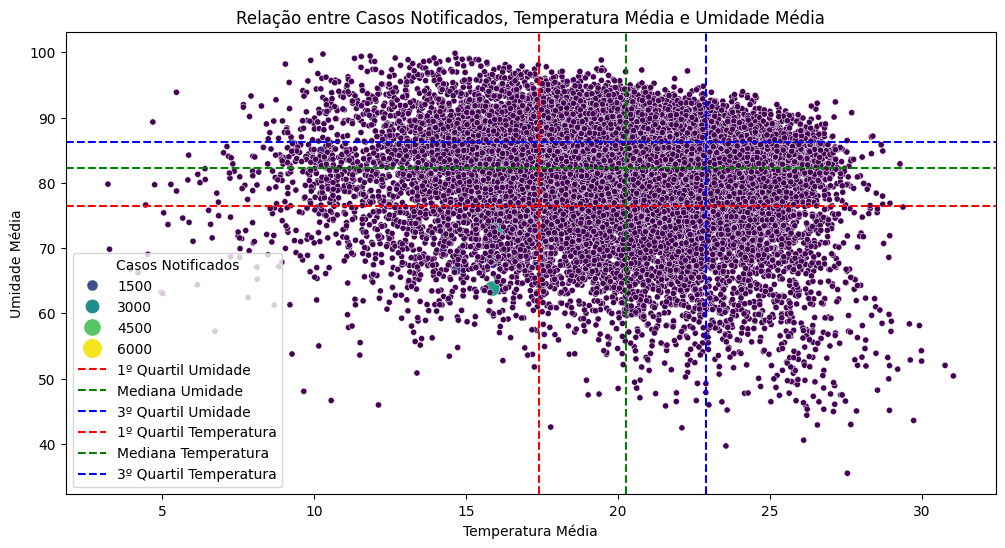

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Criar um gráfico de dispersão com cores representando os casos notificados
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp_med', y='umid_med', hue='casos_notif', data=df_combined, palette='viridis', size='casos_notif', sizes=(20, 200))
plt.xlabel('Temperatura Média')
plt.ylabel('Umidade Média')
plt.title('Relação entre Casos Notificados, Temperatura Média e Umidade Média')

# Calcular e traçar quartis e medianas para os eixos x e y
quartis_temp = np.percentile(df_combined['temp_med'], [25, 50, 75])
quartis_umid = np.percentile(df_combined['umid_med'], [25, 50, 75])

plt.axhline(quartis_umid[0], color='r', linestyle='--', label='1º Quartil Umidade')
plt.axhline(quartis_umid[1], color='g', linestyle='--', label='Mediana Umidade')
plt.axhline(quartis_umid[2], color='b', linestyle='--', label='3º Quartil Umidade')

plt.axvline(quartis_temp[0], color='r', linestyle='--', label='1º Quartil Temperatura')
plt.axvline(quartis_temp[1], color='g', linestyle='--', label='Mediana Temperatura')
plt.axvline(quartis_temp[2], color='b', linestyle='--', label='3º Quartil Temperatura')

plt.legend(title='Casos Notificados')
plt.show()


---

## Pré-Processamento

Definimos algumas funções que utilizaremos para obtenção das métricas (`RMSE` e `MAE`)   
como definido nas especificações técnicas. Também definimos as funções `show_dtypes` que imprime
o tipo de dados das colunas, e `create_df_to_predict` que gera um novo dataframe com dados inéditos que podem ser utilizados para obter predições.

In [9]:
def mae(y_true, y_pred):
    """Retorna o erro absoluto médio (MAE, do inglês median absolute error)"""
    return median_absolute_error(y_true, y_pred)

def rmse(y_true, y_pred):
    """Retorna a raiz do erro quadrático médio (RMSE, do inglês Root Mean Squared Error)"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def show_dtypes(df: pd.DataFrame):
    for column_name in df.columns:
        print(column_name, type(df[column_name].iat[0]))

<small>Maiores detalhes sobre as métricas podem ser encontradas no material: [**Machine learning I – Classificação e Regressão**](#Referências-Bibliográficas), página 132.</small>

### Agrupamento por Notificações em um Mesmo Local

A estratégia é obter o atributo alvo (casos de dengue) em um período semanal, de forma que o modelo possa predizer casos de dengue que incidirão na próxima semana.
Uma vez que cada observação(linha) representa uma notificação de incidência de dengue, o primeiro método de pré-processamento que aplicaremos será o agrupamento, desta forma é possível criar uma nova coluna com a contagem total de casos (`casos_notif`) num mesmo local e data, a qual chamaremos de `notificacoes`. Não precisamos nos preocupar com a perda de dados metereológicos, já que eles equivalem ao mesmo valor para cada dia.

In [10]:
dados = df.copy()
dados = dados.groupby([
    "geocodigo",         
    "nome_municipio", 
    "uf", "se_notif", 
    "ano_notif", 
    "dt_notific", 
    "temp_med", 
    "precip_med", 
    "pressao_med", 
    "umid_med",]).size().to_frame("casos_notif").reset_index()

dados.head()

geocodigo nome_municipio              uf  se_notif  ano_notif  dt_notific  \
0    4200101   Abelardo Luz  Santa Catarina         1       2021  2021-01-07   
1    4200101   Abelardo Luz  Santa Catarina         2       2021  2021-01-11   
2    4200101   Abelardo Luz  Santa Catarina         4       2019  2019-01-20   
3    4200101   Abelardo Luz  Santa Catarina         4       2021  2021-01-27   
4    4200101   Abelardo Luz  Santa Catarina         4       2023  2023-01-23   

    temp_med  precip_med  pressao_med   umid_med  casos_notif  
0  21.638310    0.437816     0.999361  80.698380            1  
1  24.511276    0.008582     0.998950  73.881610            1  
2  20.798244    0.318088     1.001368  89.685550            1  
3  21.435398    0.199986     0.996476  87.002670            2  
4  21.812561    0.040720     0.997290  84.920456            2

Checamos abaixo se há algum dado nulo em nosso conjunto, e ele se encontra completamente íntegro

In [11]:
dados.isnull().values.any()

False

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49124 entries, 0 to 49123
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   geocodigo       49124 non-null  int64  
 1   nome_municipio  49124 non-null  object 
 2   uf              49124 non-null  object 
 3   se_notif        49124 non-null  int64  
 4   ano_notif       49124 non-null  int64  
 5   dt_notific      49124 non-null  object 
 6   temp_med        49124 non-null  float64
 7   precip_med      49124 non-null  float64
 8   pressao_med     49124 non-null  float64
 9   umid_med        49124 non-null  float64
 10  casos_notif     49124 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 4.1+ MB


Através do método info, podemos identificar os tipos de dados (dtypes) de nosso conjunto. Entretanto, todos os atributos que não são do tipo int ou float acabam sendo exibidos como tipo `object`, podemos checar o tipo "por dentro" de cada coluna, através da nossa função utilitária `show_dtypes` já declarada anteriormente.

In [13]:
show_dtypes(dados)

geocodigo <class 'numpy.int64'>
nome_municipio <class 'str'>
uf <class 'str'>
se_notif <class 'numpy.int64'>
ano_notif <class 'numpy.int64'>
dt_notific <class 'str'>
temp_med <class 'numpy.float64'>
precip_med <class 'numpy.float64'>
pressao_med <class 'numpy.float64'>
umid_med <class 'numpy.float64'>
casos_notif <class 'numpy.int64'>


### Agrupamento por Intervalo Semanal

Agora realizamos mais um agrupamento, desta vez por um período semanal. Entretanto, vale observar que perderíamos os dados metereológicos, já que os mesmos foram coletados em cada dia específico, para solucionar este problema, utilizamos funções de agregamento de dados (através do método `agg`), onde calcularemos a média dos dados metereológicos naquele período semanal, ou seja, se agrupamos 5 dias em um dado período semanal, consideraremos a média do campo `temp_med` nesses cincos dias.

### Concentrando Dados de Localização em uma única coluna

Tamém aproveitamos para concentar os dados referentes a localização (`geocodigo`, `nome_municipio`, `uf`) em uma única coluna `geocodigo`, que já é um identificador único para cada município, e suficiente para nosso objetivo.

Por último, ordenamos os dados por `geocodigo`, `ano_notif` e `se_notif`..

In [14]:
dados = dados.groupby(["geocodigo", "se_notif", "ano_notif"]).agg(
    temp_med=pd.NamedAgg(column="temp_med", aggfunc=np.mean),
    precip_med=pd.NamedAgg(column="precip_med", aggfunc=np.mean),
    pressao_med=pd.NamedAgg(column="pressao_med", aggfunc=np.mean),
    umid_med=pd.NamedAgg(column="umid_med", aggfunc=np.mean),
    casos_notif=pd.NamedAgg(column="casos_notif", aggfunc=np.sum),
).reset_index().sort_values(by=["geocodigo", "ano_notif", "se_notif"])


dados.head()

geocodigo  se_notif  ano_notif   temp_med  precip_med  pressao_med  \
106    4200101        51       2013  23.136734    0.014977     0.997532   
36     4200101        14       2015  17.778450    0.000185     1.004061   
101    4200101        49       2015  21.080536    1.359301     0.997142   
5      4200101         5       2016  20.464245    2.999250     1.002138   
9      4200101         6       2016  24.267890    0.081308     0.999698   

      umid_med  casos_notif  
106  73.639946            1  
36   69.067700            1  
101  85.667500            1  
5    94.313675            2  
9    79.991390            1

In [15]:
dados["se_notif"].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

#### Criando Coluna com Notificações da Semana Seguinte

Uma vez que desejams que o modelo realize a predição de notificações na semana posterior, precisamos criar uma nova coluna não com as notificações da semana corrente, mas sim da próxima.
Esta etapa permite que o modelo utilize as notificações da semana seguinte como atributo-alvo (variável dependente). Para isso realizaremos uma filtragem com as seguintes condições:

- validar se a localização da próxima linha é a mesma da linha corrente
- validar se o ano da próxima linha é o mesmo da linha corrente
- validar se a semana epidemológica da próxima linha é a mesma da linha corrente
- caso seja a última semana epidemológica (52 ou 53), checamos se a próxima semana é 1 do ano seguinte
- enfim gerar a coluna com o valor de notificações da semana seguinte, caso contrário Nulo
- as linhas com valores nulos serão excluídas

In [16]:
# Criamos variáveis de referência para realizamos a filtragem
# utilizaremos local, ano e semana epidemológica
dados["prox_local"] = dados["geocodigo"].shift(-1, fill_value=0).astype(int)
dados["prox_ano"] = dados["ano_notif"].shift(-1, fill_value=0).astype(int)
dados["prox_semana"] = dados["se_notif"].shift(-1, fill_value=0).astype(int)

# declaramos uma condicional nomeada `filter` que será utilzada para validar quando o números de 
# notificações da próxima linha, correspondem a semana seguinte em sequência.
# na última semana epidemológica 52 ou 53 checamos se a próxima semana é a primeira do ano seguinte (1)
filter = (
    (dados["geocodigo"] == dados["prox_local"]) & 
    (
        ((dados["ano_notif"] == dados["prox_ano"]) & (dados["se_notif"] + 1 == dados["prox_semana"])) |
        ((dados["ano_notif"] + 1 == dados["prox_ano"]) & (dados["se_notif"] == 52) & (dados["prox_semana"] == 1)) |
        ((dados["ano_notif"] + 1 == dados["prox_ano"]) & (dados["se_notif"] == 53) & (dados["prox_semana"] == 1))
    )
)
dados["casos_notif_prox_se"] = np.where(filter, dados["casos_notif"].shift(-1, fill_value=0).astype("Int64"), np.nan)

In [17]:
dados[:50]

geocodigo  se_notif  ano_notif   temp_med  precip_med  pressao_med  \
106    4200101        51       2013  23.136734    0.014977     0.997532   
36     4200101        14       2015  17.778450    0.000185     1.004061   
101    4200101        49       2015  21.080536    1.359301     0.997142   
5      4200101         5       2016  20.464245    2.999250     1.002138   
9      4200101         6       2016  24.267890    0.081308     0.999698   
12     4200101         7       2016  24.031984    0.103635     0.998916   
14     4200101         8       2016  22.739680    0.252787     0.998588   
18     4200101         9       2016  19.222017    0.270144     0.999304   
20     4200101        10       2016  20.802109    0.002605     1.002806   
24     4200101        11       2016  21.026299    0.005830     1.006617   
32     4200101        13       2016  22.925083    0.048456     1.004214   
37     4200101        14       2016  24.064388    0.001380     1.004239   
41     4200101        15       2016  22.026338    0.376573     1.002569   
48     4200101        17       2016  20.585472    0.642469     0.993678   
85     4200101        33       2016  15.786873    0.765836     0.999082   
104    4200101        50       2016  18.608234    0.000947     1.006547   
2      4200101         4       2019  20.798244    0.318088     1.001368   
66     4200101        23       2019  14.710865    0.002818     1.007670   
28     4200101        12       2020  22.029732    0.464436     1.000079   
49     4200101        17       2020  17.755062    0.000162     1.006656   
58     4200101        20       2020  19.180511    0.000000     1.003681   
61     4200101        21       2020  18.591839    0.000145     1.006779   
63     4200101        22       2020  14.040028    0.000000     1.006205   
67     4200101        23       2020  12.616298    0.633462     1.006881   
69     4200101        24       2020  16.887810    1.198797     1.002421   
72     4200101        25       2020  16.205167    0.000083     1.008630   
74     4200101        26       2020  14.943565    0.206799     1.003674   
76     4200101        27       2020  15.372807    1.314240     0.995544   
79     4200101        28       2020  15.229530    0.285653     1.002736   
80     4200101        29       2020  13.648716    0.079447     1.007328   
81     4200101        30       2020  17.834856    0.000000     1.004234   
82     4200101        31       2020  15.359917    0.567171     1.003850   
83     4200101        32       2020  15.908565    0.000000     1.012564   
86     4200101        34       2020  17.127655    0.163931     1.000401   
87     4200101        35       2020  20.730968    0.000000     1.003124   
88     4200101        36       2020  19.932999    0.000000     1.005048   
90     4200101        39       2020  17.384968    0.000000     1.009025   
92     4200101        41       2020  16.614815    0.639650     0.999598   
94     4200101        43       2020  23.168460    0.012561     1.001301   
97     4200101        46       2020  19.476662    0.404239     1.000053   
98     4200101        47       2020  19.853176    0.278857     0.997839   
102    4200101        49       2020  19.383545    0.982880     0.995781   
0      4200101         1       2021  21.638310    0.437816     0.999361   
1      4200101         2       2021  24.511276    0.008582     0.998950   
3      4200101         4       2021  21.435398    0.199986     0.996476   
6      4200101         5       2021  17.852787    0.021540     0.999193   
10     4200101         6       2021  19.357574    0.525064     1.001113   
15     4200101         8       2021  23.538898    0.000509     1.000973   
21     4200101        10       2021  18.851128    0.000000     0.998798   
25     4200101        11       2021  24.154010    0.019544     0.998760   

      umid_med  casos_notif  prox_local  prox_ano  prox_semana  \
106  73.639946            1     4200101      2015           14   
36   69.067700            1     4200101      20

Uma vez que identificamos as semanas que se encontram em sequência, podemos descartar as linhas que não se enquadram nos critérios de semanas sequenciais.

In [18]:
# excluímos as semanas que não correspondem a condicional
# que veirifica se a semana está em sequência
dados = dados.dropna(subset=["casos_notif_prox_se"]).reset_index(drop=True)

# convertemos notificacoes_prox_semana para int novamente, após deletarmos os campos nulos
dados["casos_notif_prox_se"] = dados["casos_notif_prox_se"].astype(int)

# filtramos o novo dataframe sem as colunas de referência que utilizamos para gerar os valores da próxima semana
# prox_ano, prox_local, prox_semana, notificacoes através do método `drop`
dados = dados.drop(["casos_notif", "prox_semana", "prox_ano", "prox_local"], axis=1)

dados.head()

geocodigo  se_notif  ano_notif   temp_med  precip_med  pressao_med  \
0    4200101         5       2016  20.464245    2.999250     1.002138   
1    4200101         6       2016  24.267890    0.081308     0.999698   
2    4200101         7       2016  24.031984    0.103635     0.998916   
3    4200101         8       2016  22.739680    0.252787     0.998588   
4    4200101         9       2016  19.222017    0.270144     0.999304   

    umid_med  casos_notif_prox_se  
0  94.313675                    1  
1  79.991390                    6  
2  84.045003                    2  
3  85.818240                    3  
4  83.770830                    1

Reordenamos as colunas para melhor legibilidade

In [19]:
dados = dados[["geocodigo", 
               "ano_notif", 
               "se_notif", 
               "casos_notif_prox_se", 
               "temp_med", 
               "precip_med", 
               "pressao_med", 
               "umid_med"]]
dados.head()

geocodigo  ano_notif  se_notif  casos_notif_prox_se   temp_med  precip_med  \
0    4200101       2016         5                    1  20.464245    2.999250   
1    4200101       2016         6                    6  24.267890    0.081308   
2    4200101       2016         7                    2  24.031984    0.103635   
3    4200101       2016         8                    3  22.739680    0.252787   
4    4200101       2016         9                    1  19.222017    0.270144   

   pressao_med   umid_med  
0     1.002138  94.313675  
1     0.999698  79.991390  
2     0.998916  84.045003  
3     0.998588  85.818240  
4     0.999304  83.770830

### Adequando Dados Categóricos com *One-Hot Encoding*

Alguns algoritmos não conseguem interpretar dados categóricos, eles indicam um erro se utilizarmos dados do tipo string (`str`), e tratam dados categóricos do tipo `int`, como o campo `geocodigo` em nosso conjunto, como dados discretos (numéricos), o que atrapalha a performance do mesmo, já que o algoritmo interpretaria o geocódigo para o município de Abaiara/CE `2300101` como um dado discreto com valor de dois milhões trezentos mil cento e um, assim como os outros dados discretos (`se_notif`, `ano_notif`, `temp_med`, `precip_med`, `pressao_med`, `umid_med`, `casos_notif`). A solução será transformarmos este atributo categórico em um valor booleano que o modelo possa entender, esta técnica se chama *One-Hot Encoding*, e a biblioteca pandas nos fornece uma função chamada `get_dummies` que realiza todo o processo. 

<small>Uma abordagem mais aprodundada sobre adequação de dados categóricos pode ser encontrada no material escrito: [**Preparação e Análise Exploratória de Dados**](#Referências-Bibliográficas), página 134.</small> 

O algoritmo **Random Forest** não aceita strings (`str`), por isso precisamos converter nossas localizações para uma forma que nosso ele entenda, a biblioteca pandas oferece uma função que realiza este processo automaticamente, como citado anteriormente, a função se chama `get_dummies`.

In [20]:
dados = pd.get_dummies(
    dados, columns=["geocodigo"], prefix_sep="_",drop_first=True
)

In [21]:
dados.head()

ano_notif  se_notif  casos_notif_prox_se   temp_med  precip_med  \
0       2016         5                    1  20.464245    2.999250   
1       2016         6                    6  24.267890    0.081308   
2       2016         7                    2  24.031984    0.103635   
3       2016         8                    3  22.739680    0.252787   
4       2016         9                    1  19.222017    0.270144   

   pressao_med   umid_med  geocodigo_4200200  geocodigo_4200309  \
0     1.002138  94.313675              False              False   
1     0.999698  79.991390              False              False   
2     0.998916  84.045003              False              False   
3     0.998588  85.818240              False              False   
4     0.999304  83.770830              False              False   

   geocodigo_4200408  ...  geocodigo_4219002  geocodigo_4219101  \
0              False  ...              False              False   
1              False  ...              False              False   
2              False  ...              False              False   
3              False  ...              False              False   
4              False  ...              False              False   

   geocodigo_4219176  geocodigo_4219200  geocodigo_4219309  geocodigo_4219507  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   geocodigo_4219606  geocodigo_4219705  geocodigo_4219853  geocodigo_4220000  
0              False              False              False              False  
1              False              False              False              False  
2              False              False              False              False  
3              False              False              False              False  
4              False              False              False              False  

[5 rows x 239 columns]

#### Particionando os Dados

Aqui é onde selecionaremos os** atributos preditore**(variáveis independentes)s, aqueles que serão utilizados para encontrar nossso atributso-alvo variável dependente, ou seja, (total de notificações de incidências de dengueda  seman posteriora). Particionaremos os dados com a função train_test_split da biblioteca sklearnnuma proporçãom805% para treino e 05% para testes.

In [22]:
# variavel independente, ou variável preditora
X = dados.drop(["casos_notif_prox_se"], axis=1)

# selecionamos o atributo-alvo o qual desejamos fazer a predição de saída
# variável dependente
y = dados["casos_notif_prox_se"]

# particionamos os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Podemos observar uma amostra de nossas variáveis independentes.
Como podemos observar, nossa variáveis dependente (`casos_notif_prox_se`) não está entre os valores

In [23]:
X[:3]

ano_notif  se_notif   temp_med  precip_med  pressao_med   umid_med  \
0       2016         5  20.464245    2.999250     1.002138  94.313675   
1       2016         6  24.267890    0.081308     0.999698  79.991390   
2       2016         7  24.031984    0.103635     0.998916  84.045003   

   geocodigo_4200200  geocodigo_4200309  geocodigo_4200408  geocodigo_4200507  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   

   ...  geocodigo_4219002  geocodigo_4219101  geocodigo_4219176  \
0  ...              False              False              False   
1  ...              False              False              False   
2  ...              False              False              False   

   geocodigo_4219200  geocodigo_4219309  geocodigo_4219507  geocodigo_4219606  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   

   geocodigo_4219705  geocodigo_4219853  geocodigo_4220000  
0              False              False              False  
1              False              False              False  
2              False              False              False  

[3 rows x 238 columns]

E também, uma amostra de nossa variável dependente(`casos_notif_prox_se`).

In [24]:
y[:3]

0    1
1    6
2    2
Name: casos_notif_prox_se, dtype: int64

#### Treinamento do Modelo

O algoritmo que escolhemos foi o **Random Forest**. O Random Forest é um algoritmo de aprendizado de máquina que é amplamente utilizado tanto para tarefas de regressão quanto para classificação. É uma técnica de ensemble, o que significa que combina várias árvores de decisão para obter previsões mais robustas e precisas.

Criamos uma instância da classe `RandomForestRegressor`, depois treinamos o modelo através do método `fit`, utilizando nossos dados de treino como argumentos.

In [25]:
# para gerar nosso modelo, basta criarmos uma instância 
# da classe RandomForestRegressor da biblioteca sklearn
random_forest = RandomForestRegressor(random_state=42)

# Treinando o Modelo com método `fit`
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Aplicação de Métricas de Avaliação

O método `score` nos retorna o $r^2$ determina o quanto nossa variáveis independentes influenciam em nossa variável dependente.

In [26]:
# r2 diz o quanto nosso X determina o nosso y
random_forest_rsquared = random_forest.score(X_test, y_test)
random_forest_rsquared

0.8144339979588026

Para obtermos as métricas (RMSE e MAE), devemos utilizar nosso conjunto reservado para testes para obter predições de nosso modelo.

In [27]:
y_pred = random_forest.predict(X_test)
y_pred

array([ 1.61, 12.01,  5.31, ...,  1.47,  2.71, 12.66])

Uma vez que nosso modelo retorna números com precisão decimal, e queremos um número inteiro, já que não existe 0.5 notificação, ou 2.5 notificações. Vamos arrendor os valores para números inteiros com o método `rint` da biblioteca **numpy**.

In [28]:
y_pred = np.rint(y_pred)
y_pred

array([ 2., 12.,  5., ...,  1.,  3., 13.])

##### Raiz do Erro Quadrático médio (RMSE, do inglês Root Mean Squared Error)

In [29]:
# raiz do erro quadrático médio
random_forest_rmse = rmse(y_test, y_pred)
random_forest_rmse

105.28991459474692

##### Erro Absoluto Médio (MAE, do inglês median absolute error).

In [30]:
# erro absoluto médio
random_forest_mae = mae(y_test, y_pred)
random_forest_mae

3.0

TODO

- [ ] Sintetizar resumidamente os resultados obtidos.- [ ] 
Evidenciar as conquistas alcançadas com a pesquisa/estud.- [ ] 
Indicar as limitações e as reconsiderações.

## Treinando Mais 3 Algoritmos de Machine Learning

Os algoritmos selecionados para comparação com o Random Forest foram:
- Decision Tree
- Gradient Boost
- Ada Boost

### Decision Tree

Decision Tree (Árvore de Decisão) é um algoritmo que organiza dados em uma estrutura de árvore para fazer previsões, especialmente em tarefas de regressão. Ela divide os dados com base em condições de decisão e fornece previsões nas folhas da árvore. Já o Random Forest (Floresta Aleatória) é uma extensão desse conceito que cria várias árvores de decisão independentes e combina suas previsões para melhorar a precisão e a robustez do modelo, reduzindo o overfitting e aumentando o desempenho geral em tarefas de regressão.

#### Treinamento do Modelo

Criamos uma instância da classe `DecisionTreeRegressor`, depois treinamos o modelo através do método `fit`, utilizando nossos dados de treino como argumentos.

In [31]:
# para gerar nosso modelo, basta criarmos uma instância 
# da classe RandomForestRegressor da biblioteca sklearn
decision_tree = DecisionTreeRegressor(random_state=42)

# Treinando o Modelo com método `fit`
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#### Aplicação de Métricas de Avaliação

O método `score` nos retorna o $r^2$ determina o quanto nossa variáveis independentes influenciam em nossa variável dependente.

In [32]:
# r2 diz o quanto nosso X determina o nosso y
decision_tree_rsquared = decision_tree.score(X_test, y_test)
decision_tree_rsquared

0.9051127123787971

Para obtermos as métricas (RMSE e MAE), devemos utilizar nosso conjunto reservado para testes para obter predições de nosso modelo.

In [33]:
decision_tree_y_pred = decision_tree.predict(X_test)
decision_tree_y_pred

array([ 1., 11., 10., ...,  1.,  1.,  1.])

Uma vez que nosso modelo retorna números com precisão decimal, e queremos um número inteiro, já que não existe 0.5 notificação, ou 2.5 notificações. Vamos arrendor os valores para números inteiros com o método `rint` da biblioteca **numpy**.

In [34]:
decision_tree_y_pred = np.rint(decision_tree_y_pred)
decision_tree_y_pred

array([ 1., 11., 10., ...,  1.,  1.,  1.])

##### Raiz do Erro Quadrático médio (RMSE, do inglês Root Mean Squared Error)

In [35]:
# raiz do erro quadrático médio
decision_tree_rmse = rmse(y_test, decision_tree_y_pred)
decision_tree_rmse

75.29017685019154

##### Erro Absoluto Médio (MAE, do inglês median absolute error).

In [36]:
# erro absoluto médio
decision_tree_mae = mae(y_test, decision_tree_y_pred)
decision_tree_mae

3.0

### Gradient Boosting

O GradientBoost ou Gradient Boosting é um algoritmo de aprendizado de máquina que melhora a precisão das previsões combinando vários modelos de aprendizado fracos, como árvores de decisão simples. Ele funciona construindo sequencialmente novos modelos que corrigem os erros dos modelos anteriores, com foco nas amostras que foram previamente mal previstas. Essa abordagem gradual, impulsionada pelo gradiente, permite a criação de modelos altamente precisos e complexos, tornando-o eficaz em tarefas de classificação e regressão, mas também pode ser sensível a hiperparâmetros e exigir ajustes cuidadosos.

#### Treinamento do Modelo

Criamos uma instância da classe `GradientBoostingRegressor`, depois treinamos o modelo através do método `fit`, utilizando nossos dados de treino como argumentos.

In [37]:
# para gerar nosso modelo, basta criarmos uma instância 
# da classe RandomForestRegressor da biblioteca sklearn
gradient_boost = GradientBoostingRegressor(random_state=42)

# Treinando o Modelo com método `fit`
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

#### Aplicação de Métricas de Avaliação

O método `score` nos retorna o $r^2$ determina o quanto nossa variáveis independentes influenciam em nossa variável dependente.

In [38]:
# r2 diz o quanto nosso X determina o nosso y
gradient_boost_rsquared = gradient_boost.score(X_test, y_test)
gradient_boost_rsquared

0.7079717786234769

Para obtermos as métricas (RMSE e MAE), devemos utilizar nosso conjunto reservado para testes para obter predições de nosso modelo.

In [39]:
gradient_boost_y_pred = gradient_boost.predict(X_test)
gradient_boost_y_pred

array([-7.08395949, 24.63830088,  5.29852892, ..., 22.7670332 ,
       -1.91616084, 35.19143734])

Uma vez que nosso modelo retorna números com precisão decimal, e queremos um número inteiro, já que não existe 0.5 notificação, ou 2.5 notificações. Vamos arrendor os valores para números inteiros com o método `rint` da biblioteca **numpy**.

In [40]:
gradient_boost_y_pred = np.rint(gradient_boost_y_pred)
gradient_boost_y_pred

array([-7., 25.,  5., ..., 23., -2., 35.])

##### Raiz do Erro Quadrático médio (RMSE, do inglês Root Mean Squared Error)

In [41]:
# raiz do erro quadrático médio
gradient_boost_rmse = rmse(y_test, gradient_boost_y_pred)
gradient_boost_rmse

132.08126998098646

##### Erro Absoluto Médio (MAE, do inglês median absolute error).

In [42]:
# erro absoluto médio
gradient_boost_mae = mae(y_test, gradient_boost_y_pred)
gradient_boost_mae

14.0

### Ada Boost

O AdaBoost, ou Adaptive Boosting, é um algoritmo de aprendizado de máquina que melhora a precisão do modelo combinando vários modelos de aprendizado fracos, como classificadores simples. No AdaBoost, cada modelo fraco é atribuído a uma amostra com pesos, de modo que o foco se concentra nas amostras que foram classificadas incorretamente pelos modelos anteriores. Em seguida, ele combina esses modelos fracos ponderados para formar um modelo forte, capaz de fazer previsões precisas. O AdaBoost é especialmente útil em tarefas de classificação, pois pode melhorar o desempenho mesmo em conjuntos de dados complexos e desequilibrados.

#### Treinamento do Modelo

Criamos uma instância da classe `AdaBoostRegressor`, depois treinamos o modelo através do método `fit`, utilizando nossos dados de treino como argumentos.

In [43]:
# para gerar nosso modelo, basta criarmos uma instância 
# da classe RandomForestRegressor da biblioteca sklearn
ada_boost = AdaBoostRegressor(random_state=42)

# Treinando o Modelo com método `fit`
ada_boost.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

#### Aplicação de Métricas de Avaliação

O método `score` nos retorna o $r^2$ determina o quanto nossa variáveis independentes influenciam em nossa variável dependente.

In [44]:
# r2 diz o quanto nosso X determina o nosso y
ada_boost_rsquared = ada_boost.score(X_test, y_test)
ada_boost_rsquared

-0.24108198388119795

Para obtermos as métricas (RMSE e MAE), devemos utilizar nosso conjunto reservado para testes para obter predições de nosso modelo.

In [45]:
ada_boost_y_pred = ada_boost.predict(X_test)
ada_boost_y_pred

array([146.98458574, 169.19302326, 202.79868578, ..., 202.79868578,
       233.66289049, 344.2834507 ])

Uma vez que nosso modelo retorna números com precisão decimal, e queremos um número inteiro, já que não existe 0.5 notificação, ou 2.5 notificações. Vamos arrendor os valores para números inteiros com o método `rint` da biblioteca **numpy**.

In [46]:
ada_boost_y_pred = np.rint(ada_boost_y_pred)
ada_boost_y_pred

array([147., 169., 203., ..., 203., 234., 344.])

##### Raiz do Erro Quadrático médio (RMSE, do inglês Root Mean Squared Error)

In [47]:
# raiz do erro quadrático médio
ada_boost_rmse = rmse(y_test, ada_boost_y_pred)
ada_boost_rmse

272.3115874240785

##### Erro Absoluto Médio (MAE, do inglês median absolute error).

In [48]:
# erro absoluto médio
ada_boost_mae = mae(y_test, ada_boost_y_pred)
ada_boost_mae

216.0

### Comparando Performance dos Algoritmos

In [49]:
metrics = pd.DataFrame({
    "Algoritmo": ["Random Forest", "Decision Tree", "Gradient Boost", "Ada Boost"],
    "R²": [random_forest_rsquared, decision_tree_rsquared, gradient_boost_rsquared, ada_boost_rsquared], 
    "RMSE": [random_forest_rmse, decision_tree_rmse, gradient_boost_rmse, ada_boost_rmse], 
    "MAE": [random_forest_mae, decision_tree_mae, gradient_boost_mae, ada_boost_mae], 
})

metrics.head()

Algoritmo        R²        RMSE    MAE
0   Random Forest  0.814434  105.289915    3.0
1   Decision Tree  0.905113   75.290177    3.0
2  Gradient Boost  0.707972  132.081270   14.0
3       Ada Boost -0.241082  272.311587  216.0

TODO
- [ ] adicionar gráfico de barras comparando as métricas dos  algoritmos

### Predizendo Notificações

TODO
- [ ] criar mais alguns dataframes para alimentar o preditor (talvez uma função deixe isso mais prático)

Primeiro declaramos mais funções utilitárias

In [50]:
def get_location_info(geocodigo):
    row = df[df['geocodigo'] == int(geocodigo)]
    if not row.empty:
        uf = row['uf'].values[0]
        nome_municipio = row['nome_municipio'].values[0]
        return f"{nome_municipio}, {uf}"
    else:
        return "Geocodigo not found"

def create_df_to_predict(df, geocodigo, ano_notif=2023, se_notif=36, temp_med=18.9578, precip_med=0.2807, pressao_med=1.0054, umid_med=86.0483):
    """Cria um dataframe para predizer"""
    df_to_predict = pd.DataFrame(columns=['ano_notif', 'se_notif', 'temp_med', 'precip_med', 'pressao_med', 'umid_med'] + [col for col in df.columns if col.startswith('geocodigo_')])
    
    # Set the specified columns to their values
    df_to_predict.loc[0] = [ano_notif, se_notif, temp_med, precip_med, pressao_med, umid_med] + [False] * (len(df.columns) - 6)  # Subtract 6 for the specific columns
    
    # Set the specified location column to True and all others to False for the first row
    df_to_predict['geocodigo_' + geocodigo] = True
    
    return df_to_predict

In [51]:
get_location_info('4209102')

'Joinville, Santa Catarina'

In [52]:
new_data = create_df_to_predict(X, geocodigo="4209102", se_notif=45)
new_data

ano_notif  se_notif  temp_med  precip_med  pressao_med  umid_med  \
0       2023        45   18.9578      0.2807       1.0054   86.0483   

   geocodigo_4200200  geocodigo_4200309  geocodigo_4200408  geocodigo_4200507  \
0              False              False              False              False   

   ...  geocodigo_4219002  geocodigo_4219101  geocodigo_4219176  \
0  ...              False              False              False   

   geocodigo_4219200  geocodigo_4219309  geocodigo_4219507  geocodigo_4219606  \
0              False              False              False              False   

   geocodigo_4219705  geocodigo_4219853  geocodigo_4220000  
0              False              False              False  

[1 rows x 238 columns]

In [53]:
prediction = random_forest.predict(new_data)[0]

print(f"Predição: {get_location_info('4209102')} terá {round(prediction)} notificações na próxima semana")

Predição: Joinville, Santa Catarina terá 786 notificações na próxima semana


# Referências Bibliográficas

- Nogueira, Rodrigo. **Machine learning I - Classificação e Regressão**. 1ª Edição. Indaial: Centro Universitário Leonardo da Vinci, 2020.

- Costa, Simone. **Preparação e Análise Exploratória de Dados**. 1ª Edição. Indaial: Centro Universitário Leonardo da Vinci, 2020.